# Contrôle de l'oscillo (DSO-X Keysight)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyvisa
rm = pyvisa.ResourceManager()
dso=rm.open_resource('dso')

In [3]:
# Check connection
dso.query('*IDN?')

'AGILENT TECHNOLOGIES,DSO-X 3014A,MY51450686,02.00.2011101301\n'

## Récupération de la trace active

In [9]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

In [10]:
time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))

In [11]:
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))

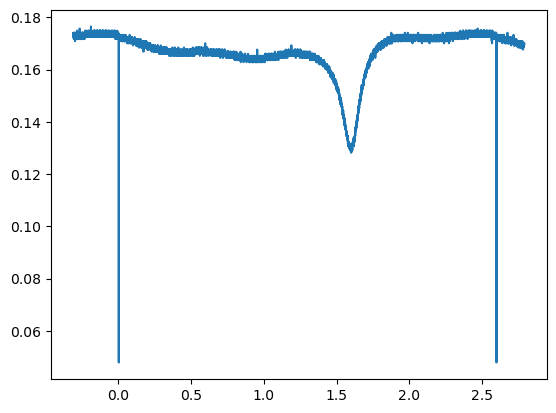

In [12]:
plt.plot(time_axis,data)

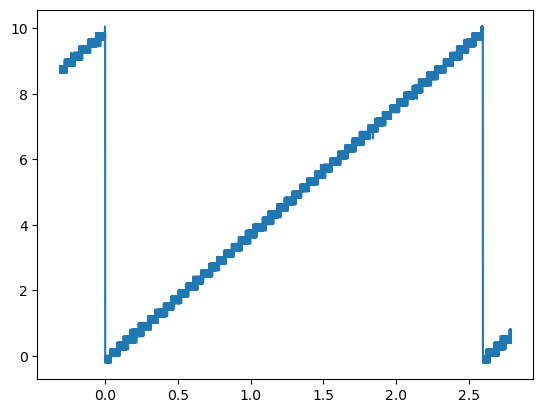

In [15]:
channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis_bis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_bis=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis_bis,data_bis)

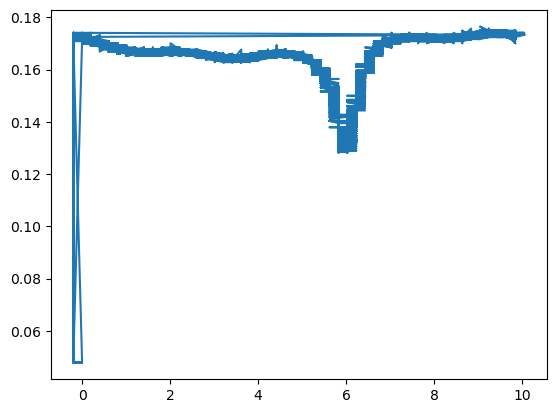

In [16]:
plt.plot(data_bis,data)

In [18]:
import h5py
with h5py.File("oscillo.hdf5", "w") as f:
    f.create_dataset("freq", data=time_axis_bis)
    f.create_dataset("channel_1", data= data)
    f.create_dataset("channel_2", data= data_bis)

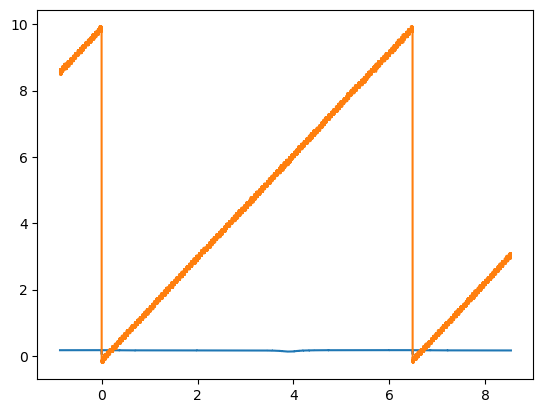

In [20]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data)

channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis_bis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_bis=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis_bis,data_bis)

In [21]:
import h5py
with h5py.File("oscillo_plus_points.hdf5", "w") as f:
    f.create_dataset("freq", data=time_axis_bis)
    f.create_dataset("channel_1", data= data)
    f.create_dataset("channel_2", data= data_bis)

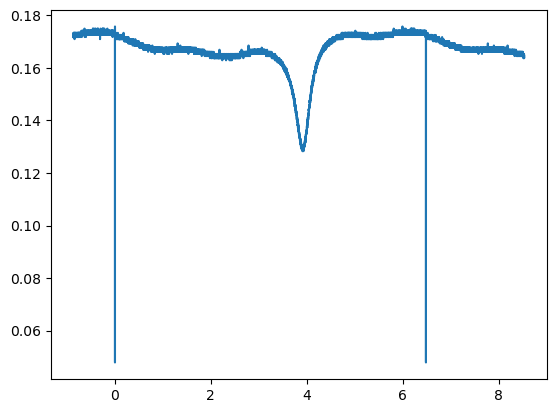

In [22]:
plt.plot(time_axis,data)

In [5]:
import h5py
with h5py.File("oscillo_bis.hdf5", "a") as f:
    f.create_dataset("freq", data=time_axis)
    f.create_dataset("channel_1", data= data_1)
    f.create_dataset("channel_2", data= data_2)
    f.create_dataset("channel_3", data= data_3)

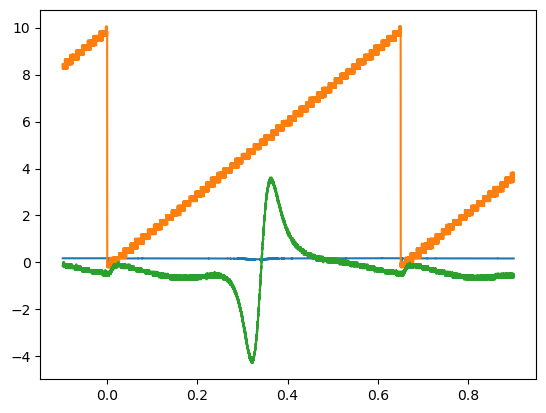

In [4]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_1=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_1)

channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_2=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_2)


channel = 3

dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_3=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_3)

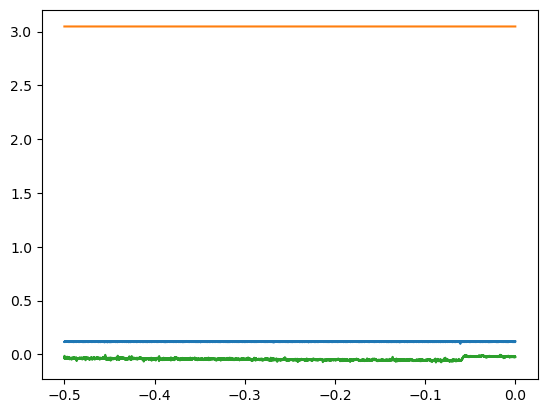

In [6]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_1=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_1)

channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_2=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_2)


channel = 3

dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_3=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_3)

In [7]:
import h5py
with h5py.File("oscillo_3.hdf5", "a") as f:
    f.create_dataset("freq", data=time_axis)
    f.create_dataset("channel_1", data= data_1)
    f.create_dataset("channel_2", data= data_2)
    f.create_dataset("channel_3", data= data_3)

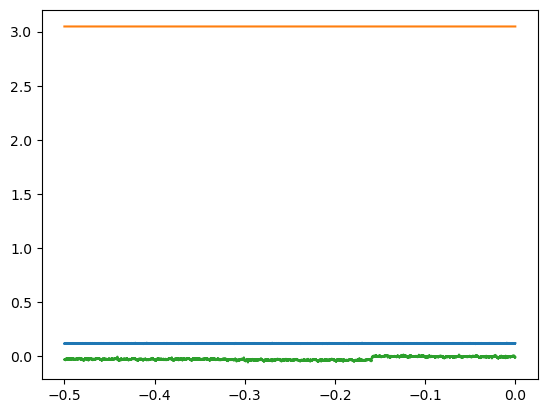

In [8]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_1=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_1)

channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_2=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_2)


channel = 3

dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_3=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_3)

In [9]:
import h5py
with h5py.File("oscillo_4.hdf5", "a") as f:
    f.create_dataset("freq", data=time_axis)
    f.create_dataset("channel_1", data= data_1)
    f.create_dataset("channel_2", data= data_2)
    f.create_dataset("channel_3", data= data_3)

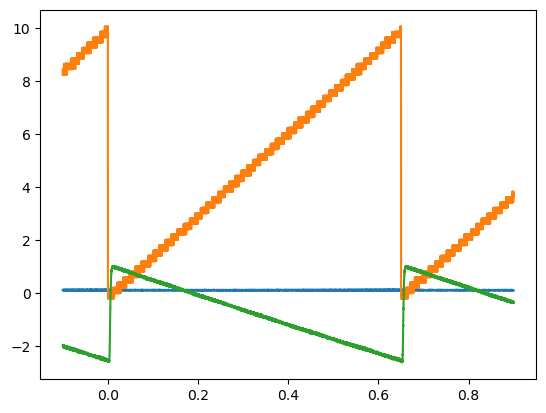

In [11]:
channel = 1
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

time_axis = (((np.linspace(0, num_points-1, num_points)
                      - preamble.get('X_REFerence')))
                     * preamble.get('X_INCrement') + preamble.get('X_ORigin'))
wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_1=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_1)

channel = 2
dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_2=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_2)


channel = 3

dso.query('*OPC?')
dso.write(f':WAVeform:SOURce CHAN{channel}')
dso.write(':WAVeform:FORMat WORD')
dso.write(':WAVeform:BYTeorder LSBFirst')
num_points = int(dso.query(':WAVeform:POINts?'))
pre = dso.query(':WAVeform:PREamble?').split(',')
preamble = {
    'X_INCrement': float(pre[4]),
    'X_ORigin': float(pre[5]),
    'X_REFerence': float(pre[6]),
    'Y_INCrement': float(pre[7]),
    'Y_ORigin': float(pre[8]),
    'Y_REFerence': float(pre[9]),
    }

wf=np.array(dso.query_binary_values(':WAVeform:DATA?',  datatype='H', is_big_endian=False))
data_3=(((wf - preamble.get('Y_REFerence')) * preamble.get('Y_INCrement')) + preamble.get('Y_ORigin'))
plt.plot(time_axis,data_3)

In [12]:
import h5py
with h5py.File("oscillo_5_sweep.hdf5", "a") as f:
    f.create_dataset("freq", data=time_axis)
    f.create_dataset("channel_1", data= data_1)
    f.create_dataset("channel_2", data= data_2)
    f.create_dataset("channel_3", data= data_3)